# Pendulum Simulation and Animation

Useful links

https://jakevdp.github.io/blog/2017/03/08/triple-pendulum-chaos/

https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

https://matplotlib.org/2.0.2/examples/animation/double_pendulum_animated.html

https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/

In [1]:
from numpy import sin, cos
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

Now, we must precompute the solution of the equation for a viscously damped pendulum, which is

$$ \frac{\text{d}\theta^2}{\text{d}t^2}+Q\frac{\text{d}\theta}{\text{d}t}+ \omega^2_0\sin(\theta t) = F(t) $$

Where $F(t)$ is an external force acting on the system. As an example we will set this to zero, but one could experiment with a pendulum driven with an haronic force on and off resonance, as this gives some interesting physical results for all kinds of resonators. So the plan is to solve the equations and obtain $(x,y)$ points for some evolution time $\Delta T$ and then animate them. 

In [3]:
# Set some constants of the problem 

L = 1.0 #Pendulum length in m
M = 1.0 #Pendulum mass in kg
g = 9.81 #g acceleration in m/s^2
Q = 0.15 # Pendulum Q factor

# Define an array for time

steps = 500

t = np.linspace(0,20,steps)

dt = t[steps-1] / steps

# Set the initial condition of the system, angular position and angular velocity

th0 = [math.pi / 6.0, 0.1 ] 

The next step is implementing the solution of the differential equation. FOr this purpose, we need to split the equation in two first order differential equations in the following way:

$$ \frac{\text{d}\theta}{\text{d}t} = f$$

and plug this in the original equation so that 

$$ \frac{\text{d}f}{\text{d}t} = -Q f + \omega^2_0\sin(\theta t) $$

These can then be fed to the ODE solver.

In [4]:
# Definition of the ODE model

def equation(theta, t, L, M, g, Q):
    first_der = theta[1] 
    second_der = -Q * theta[1] - (g / L) * np.sin(theta[0])
    dth = [first_der, second_der]
    return dth

#Integration

theta = integrate.odeint(equation, th0, t, args = (L,M,g,Q))


Now we are done. We just need to plot our results and do the animation process.

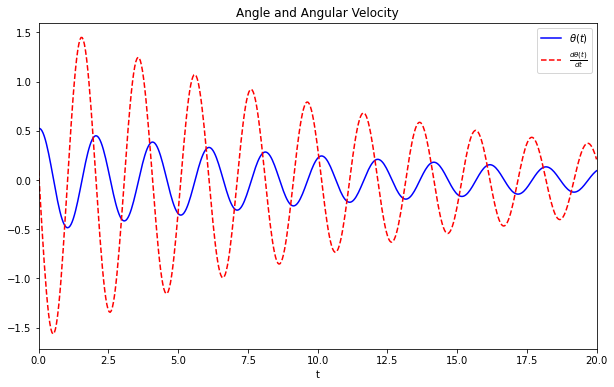

In [5]:
#Plotting

fig = plt.figure(figsize=(10,6)) 

plt.plot(t,theta[:,0], 'b-', label=r'$\theta(t)$')
plt.plot(t, theta[:,1], 'r--', label= r'$\frac{d\theta(t)}{dt}$')
plt.xlim([0,20])
plt.title('Angle and Angular Velocity')
plt.xlabel('t')
plt.legend(loc="best")
plt.show()
fig.savefig('pendulum_plot.png')

For the animation process we do not need $\theta$, we need $(x,y)$ points. This is just a matter of changing coordinates from polar to carthesian.

In [5]:
# Defining the x and y points. 

x = L * np.sin(theta[:, 0])
y = L * np.cos(theta[:, 0])

# Now set up the figure to produce 

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

# Set up the empty elements to animate later. It would be nice to add the energy and not only the elapsed time!

line, = ax.plot([], [], 'o-', lw=1)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Init function, setting both line and text to nothing

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# Animate function, updating.

def animate(i):
    line.set_data([0,x[i]], [0,-y[i]])
    time_text.set_text(time_template % (i*dt))
    return line, time_text

# Actual Animation

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(theta)), interval=10, init_func=init, blit=True)

dpi = 400
writer = animation.writers['ffmpeg'](fps=30)

ani.save('pendulum_1.mp4', writer=writer, dpi=dpi)

plt.close()

In [10]:
# SECOND ANIMATION, TRAJECTORY

plt.style.use('dark_background')

# Now set up the figure to produce 

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

# Set up the empty elements to animate later. It would be nice to add the energy and not only the elapsed time!

ln, = ax.plot([], [], lw=2) #No markers on the line now, just the line

time_template = 'time = %.1fs'
time_txt = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Init function, setting both line and text to nothing

def init2():
    ln.set_data([], [])
    time_txt.set_text('')
    return ln, time_txt

# Animate function, updating 2

xi, yi = [], []

def animate2(i):
    ln.set_data(x[0:i], -y[0:i])
    time_txt.set_text(time_template % (i*dt))
    return ln, time_txt

# Actual Animation

anim = animation.FuncAnimation(fig, animate2, np.arange(1, len(theta)), interval=10, init_func=init2, blit=True)

dpi = 400
writer = animation.writers['ffmpeg'](fps=30)

anim.save('trajectory_1.mp4', writer=writer, dpi=dpi)

plt.close()